# 13 Langevin simulation of many particles

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def mean_squared_displacement(matrix, N):
    """
    Args:
        matrix (np.array): data matrix containing the positions
        N (int): number of small particles
    """
    x0 = matrix[:N, :]
    x_t = matrix[N:, :]
    msd = np.array([np.mean(np.sum((x_t[i:i+N] - x0)**2, axis=1)) for i in range(0, x_t.shape[0], N)])
    return msd

def unwrap_coordinates(coordinates, N, D=2, L=20):
    num_frames = coordinates.shape[0] // N
    unwrapped_coordinates = coordinates[:, :D] + coordinates[:, D:]*L
    return unwrapped_coordinates
 

## With prof data is very noisy

Buffering...: 100%|███████████████████████████████| 1/1 [00:06<00:00,  6.01s/it]


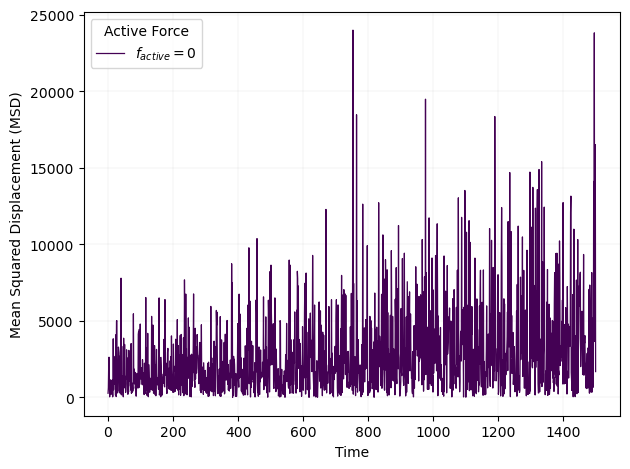

In [11]:

# Loop throught the files to analyze with progress bar
for idx, _ in tqdm(enumerate(range(file_to_analyze)), desc="Buffering...", colour="green", total=file_to_analyze):
    folder = "C-sim/test_superclean/CONF"
    file_name = "traj__N500-n2_20x20_T1.00_k0.0-10.0_r0.125-10.0_R1.250-20.0_dt0.0050_v0.000000_t10.00"
    active_force = active_force_files[idx]
    file_path = "C-sim/test_superclean/CONF/traj__N2000-n2_40x40_T1.00_k0.0-10.0_r0.125-10.0_R1.250-20.0_dt0.0050_v0.000000_t10.00.dat"

    # Load data and perform analysis
    data_traj = np.genfromtxt(file_path)
    
    # First row is useless
    # From i = 0 to i = N:
    # Columns: x[i][0], x[i][1], travel[i][0], travel[i][1]
    # Then: x_trap[0], x_trap[1], travel[0][0], travel[0][1]
    
    # Define data filtering parameters
    skip_interval = 1
    num_small_particles = N  # Replace with your specific variable
    num_big_particles = N_big_particles  # Replace with your specific variable

    # Filter useless rows
    small_particle_indices = np.arange(0, data_traj.shape[0], 2*skip_interval + (num_small_particles + num_big_particles))
    data_small = np.delete(data_traj, small_particle_indices, axis=0)

    # Filter trap coordinates
    trap_indices = np.arange(num_small_particles + num_big_particles, data_small.shape[0], num_small_particles + num_big_particles + 1)
    trap_coords = data_small[trap_indices, :]
    data_filtered = np.delete(data_small, trap_indices, axis=0)

    # Separate big particle data (optional alternative to deletion)
    big_particle_indices = np.arange(0, data_filtered.shape[0], num_small_particles + num_big_particles)
    data_big = data_filtered[big_particle_indices, :]
    data_without_big = np.delete(data_filtered, big_particle_indices, axis=0)

    # Perform analysis based on all_particles flag
    if all_particles:
        unwrapped_data = unwrap_coordinates(data_without_big, num_small_particles, D, L) 
        msd = mean_squared_displacement(unwrapped_data, num_small_particles, L)  
    else:
        unwrapped_data = unwrap_coordinates(data_big, 1, D)  
        msd = mean_squared_displacement(unwrapped_data, 1)  

    plt.plot(msd[:1500], label=r'$f_{active}=$'+f'{_}', color=colors[_], lw=0.9)

plt.xlabel("Time")  
plt.ylabel("Mean Squared Displacement (MSD)")  
plt.legend(title="Active Force", loc="upper left")  
plt.tight_layout()
plt.grid(lw=0.1)

if all_particles and save_fig:
    plt.savefig(f'all_particles_diffusion.png', dpi=500)
elif save_fig:
    plt.savefig(f'probe_diffusion.png', dpi=500)
plt.show()

Buffering...: 100%|███████████████████████████████| 4/4 [00:09<00:00,  2.28s/it]


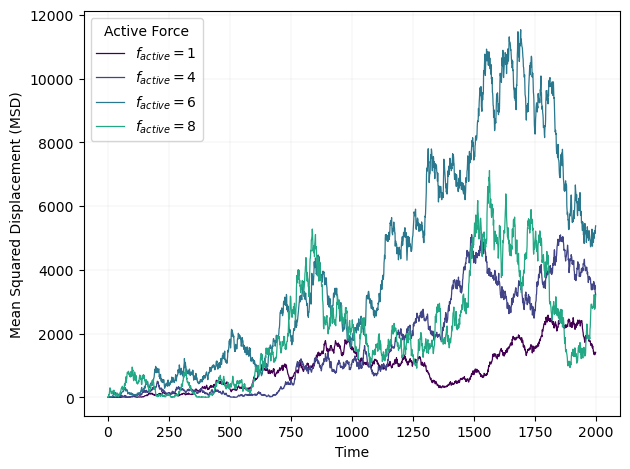

In [8]:
# Configuration 
N = 500 # number of small particels
N_big_particles = 1
L = 20
dt = 10**-3
D = 2   # system dimension
file_to_analyze = 4
all_particles = False
save_fig = True
active_force_files = ['f1.dat', 'f4.dat','f6.dat','f8.dat']  
active_force_val = [1,4,6,8]  

# Plot setting 
figsize = (10, 16)
cmap = plt.cm.viridis  
colors = cmap(np.linspace(0, 1, file_to_analyze+2)) 


# Function to generate file path with active force value
def get_file_path(folder, file_name, active_force):
    return f"{folder}/{file_name}_{active_force}"

# Loop throught the files to analyze with progress bar
for idx, _ in tqdm(enumerate(range(file_to_analyze)), desc="Buffering...", colour="green", total=file_to_analyze):
    folder = "C-sim/test_superclean/CONF"
    file_name = "traj__N500-n2_20x20_T1.00_k0.0-10.0_r0.125-10.0_R1.250-20.0_dt0.0050_v2000.000000_t10.00"
    active_force = active_force_files[idx]
    file_path = get_file_path(folder, file_name, active_force)

    # Load data and perform analysis
    data_traj = np.genfromtxt(file_path)
    
    # First row is useless
    # From i = 0 to i = N:
    # Columns: x[i][0], x[i][1], travel[i][0], travel[i][1]
    # Then: x_trap[0], x_trap[1], travel[0][0], travel[0][1]
    
    # Define data filtering parameters
    skip_interval = 1
    num_small_particles = N  # Replace with your specific variable
    num_big_particles = N_big_particles  # Replace with your specific variable

    # Filter useless rows
    small_particle_indices = np.arange(0, data_traj.shape[0], 2*skip_interval + (num_small_particles + num_big_particles))
    data_small = np.delete(data_traj, small_particle_indices, axis=0)

    # Filter trap coordinates
    trap_indices = np.arange(num_small_particles + num_big_particles, data_small.shape[0], num_small_particles + num_big_particles + 1)
    trap_coords = data_small[trap_indices, :]
    data_filtered = np.delete(data_small, trap_indices, axis=0)

    # Separate big particle data (optional alternative to deletion)
    big_particle_indices = np.arange(0, data_filtered.shape[0], num_small_particles + num_big_particles)
    data_big = data_filtered[big_particle_indices, :]
    data_without_big = np.delete(data_filtered, big_particle_indices, axis=0)

    # Perform analysis based on all_particles flag
    if all_particles:
        unwrapped_data = unwrap_coordinates(data_without_big, num_small_particles, D, L) 
        msd = mean_squared_displacement(unwrapped_data, num_small_particles)  
    else:
        unwrapped_data = unwrap_coordinates(data_big, 1, D)  
        msd = mean_squared_displacement(unwrapped_data, 1)  

    plt.plot(msd[:3000], label=r'$f_{active}=$'+f'{active_force_val[_]}', color=colors[_], lw=0.9)

plt.xlabel("Time")  
plt.ylabel("Mean Squared Displacement (MSD)")  
plt.legend(title="Active Force", loc="upper left")  
plt.tight_layout()
plt.grid(lw=0.1)

if all_particles and save_fig:
    plt.savefig(f'all_particles_diffusion.png', dpi=500)
elif save_fig:
    plt.savefig(f'probe_diffusion.png', dpi=500)
plt.show()

### Gif script for ovito


In [8]:
N = 500
Ntot = 501
timesteps = 2000
n = 0

with open('particles_positions_for_gif.txt', 'w') as f:
    for t in range(timesteps):
        # Write the header for each block
        f.write(f"{Ntot}\n\n")
        
        # extract the block of n particles
        data_block = data[n:n+N,:2]
        n = n + N

        # Write the particle positions
        for i in range(N):
            x_i_0 = data_block[i,0]
            x_i_1 = data_block[i,1]
            f.write(f"1\t{x_i_0}\t{x_i_1}\t{i}\n")
            
        x_i_0 = data_big_particle[t,0]
        x_i_1 = data_big_particle[t,1]
        f.write(f"500\t{x_i_0}\t{x_i_1}\t{500}\n")